# First - Import full library

In [45]:
import pandas as pd
import numpy as np
from sklearn import  preprocessing, cross_validation, neighbors, metrics, svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

In [46]:
songs_dataset = pd.read_json('MasterSongList.json')

In [47]:
songs_dataset.head(1)

,_id,album,artist,audio_features,context,decades,genres,lyrics_features,moods,name,new_context,picture,recording_id,sub_context,yt_id,yt_views
0,{'$oid': '52fdfb440b9398049f3d7a8c'},Gangnam Style (강남스타일),PSY,"[11, 0.912744, 0.083704, 132.069, 0.293137, 0....",[work out],[],[pop],"[oppa, gangnam, style, gangnam, style, najeneu...","[energetic, motivational]",Gangnam Style (강남스타일),work out,http://images.musicnet.com/albums/073/463/405/...,50232.0,[working out: cardio],9bZkp7q19f0,2450112089


In [48]:
songs_dataset.loc[:,'genres'] = songs_dataset['genres'].apply(''.join)
def consolidateGenre(genre):
    if(len(genre) > 0):
        return genre.split(':')[0]
    else:
        return genre
songs_dataset.loc[:,'genres'] = songs_dataset['genres'].apply(consolidateGenre)

In [49]:
audio_feature_list = []
for audio_feature in songs_dataset['audio_features']:
    audio_feature_list.append(audio_feature)

In [50]:
audio_feature_header = ['key','energy','liveliness','tempo','speechiness','acousticness','instrumentalness','time_signature'
                         ,'duration','loudness','valence','danceability','mode','time_signature_confidence','tempo_confidence'
                         ,'key_confidence','mode_confidence']

df_feature =  pd.DataFrame(audio_feature_list, columns = audio_feature_header)
df_feature.loc[:,].dropna(axis=0,how='all',inplace=True)

df_feature['genres'] = songs_dataset['genres']
df_feature.head(10)

,key,energy,liveliness,tempo,speechiness,acousticness,instrumentalness,time_signature,duration,loudness,valence,danceability,mode,time_signature_confidence,tempo_confidence,key_confidence,mode_confidence,genres
0,11.0,0.912744,0.083704,132.069,0.293137,0.005423,0.000001,0.0,4.0,218.30667,-3.890,0.752186,0.726920,0.552,0.541,1.000,1.000,pop
1,6.0,0.745704,0.119955,100.008,0.046255,0.026230,0.012727,1.0,4.0,235.06086,-7.687,0.351282,0.691817,0.737,0.634,0.796,1.000,pop
2,5.0,0.709932,0.231455,130.030,0.121741,0.036662,0.000000,0.0,4.0,232.46104,-5.150,0.374390,0.704729,0.565,0.565,0.743,1.000,
3,3.0,0.705822,0.053292,126.009,0.126016,0.001966,0.000000,0.0,4.0,194.09333,-3.898,0.592798,0.875137,0.004,0.114,1.000,0.742,dance
4,3.0,0.741757,0.072774,129.985,0.051255,0.096732,0.000474,0.0,4.0,285.42667,-5.860,0.585630,0.730711,0.271,0.324,0.822,1.000,reggaeton
5,8.0,0.733856,0.093043,174.952,0.058137,0.293325,0.000000,0.0,4.0,188.94281,-4.312,0.953424,0.785102,0.177,0.404,0.826,1.000,
6,8.0,0.777375,0.054104,104.946,0.029302,0.130350,0.000000,1.0,4.0,228.29333,-5.112,0.525632,0.729051,0.817,0.672,0.394,0.963,r&b
7,7.0,0.585564,0.108297,120.014,0.038924,0.011707,0.000005,1.0,4.0,193.57333,-6.583,0.622176,0.781822,0.970,0.861,0.792,1.000,pop
8,0.0,0.418212,0.105322,129.054,0.045461,0.548385,0.000120,0.0,4.0,248.28000,-7.284,0.440790,0.841824,0.011,0.303,0.843,1.000,
9,4.0,0.814030,0.079196,124.991,0.072440,0.005355,0.000000,1.0,4.0,198.25333,-1.985,0.838512,0.700860,0.429,0.375,0.740,1.000,pop


# Consolidatin addition feature

In [51]:
# Dance
dance_df = df_feature[(songs_dataset['genres'] == 'dance') & (songs_dataset['yt_views'] > 1000)]
dance_new = pd.DataFrame(dance_df).dropna()
print("Dance")
print(dance_new.shape)

# Jazz
jazz_df = df_feature[(songs_dataset['genres'] == 'jazz') & (songs_dataset['yt_views'] > 1000)]
jazz_new = pd.DataFrame(jazz_df).dropna()
print("Jazz")
print(jazz_new.shape)

# Rock
rock_df = df_feature[(songs_dataset['genres'] == 'rock') & (songs_dataset['yt_views'] > 1000)]
rock_new = pd.DataFrame(rock_df).dropna()
print("Rock")
print(rock_new.shape)

# Rap
rap_df = df_feature[(songs_dataset['genres'] == 'rap') & (songs_dataset['yt_views'] > 1000)]
rap_new = pd.DataFrame(rap_df).dropna()
print("Rap")
print(rap_new.shape)

Dance
(1938, 18)
Jazz
(1677, 18)
Rock
(6245, 18)
Rap
(2411, 18)


/Volumes/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Volumes/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Volumes/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Volumes/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [52]:
data_add_feature = pd.concat((dance_new.sample(n=1500, replace=True), jazz_new.sample(n=1500, replace=True), rock_new.sample(n=1500, replace=True), rap_new.sample(n=1500, replace=True)), axis=0)
print(data_add_feature.shape)
data_add_feature.head(5)

(6000, 18)


,key,energy,liveliness,tempo,speechiness,acousticness,instrumentalness,time_signature,duration,loudness,valence,danceability,mode,time_signature_confidence,tempo_confidence,key_confidence,mode_confidence,genres
15556,0.0,0.513459,0.105311,120.506,0.066738,0.002782,0.125688,0.0,4.0,347.93333,-13.733,0.591069,0.795833,0.029,0.086,0.458,1.000,dance
7324,2.0,0.918279,0.068419,125.128,0.123823,0.205065,0.008204,1.0,4.0,262.54630,-6.489,0.070338,0.493950,0.152,0.300,0.562,1.000,dance
18027,2.0,0.823720,0.106530,122.680,0.035823,0.000693,0.793440,0.0,4.0,211.22621,-7.256,0.967817,0.806159,0.298,0.338,0.953,1.000,dance
13837,10.0,0.606826,0.074605,122.995,0.066987,0.000353,0.735316,0.0,4.0,472.25605,-12.380,0.271778,0.804019,0.571,0.469,0.864,0.937,dance
11267,10.0,0.604935,0.206354,108.432,0.037725,0.776031,0.344459,0.0,4.0,456.03710,-11.227,0.966342,0.864762,0.543,0.629,0.644,0.730,dance


In [53]:
df_labels = data_add_feature['genres']
df_features = data_add_feature.drop('genres', axis=1)
df_labels.unique()

array(['dance', 'jazz', 'rock', 'rap'], dtype=object)

In [54]:
scander_scaler = StandardScaler()
df_features_results = scander_scaler.fit_transform(df_features)

In [55]:
from sklearn.cross_validation import train_test_split
X = df_features_results
y = df_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 2) Build the following classifiers

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk import ConfusionMatrix


model_loreg = LogisticRegression(solver='saga',multi_class='multinomial')
model_loreg.fit(X_train, y_train)
predict = model_loreg.predict(X_test)
classifi_report = classification_report(y_test, predict)
print("#LogisticRegression")
print(classifi_report)


model_svc = SVC(C=1, gamma=1)
model_svc.fit(X_train, y_train)
predict = model_svc.predict(X_test)
classifi_report = classification_report(y_test, predict)
print("#SVC")
print(classifi_report)


model_rf = RandomForestClassifier(n_estimators=5,min_samples_split=2, max_features='log2')
model_rf.fit(X_train, y_train)
predict = model_rf.predict(X_test)
classifi_report = classification_report(y_test, predict)
print("#Random Forest")
print(classifi_report)
# confus_mat = ConfusionMatrix(list(y_test), list(predict))

#LogisticRegression
             precision    recall  f1-score   support

      dance       0.71      0.74      0.73       455
       jazz       0.83      0.87      0.85       437
        rap       0.80      0.74      0.77       455
       rock       0.73      0.73      0.73       453

avg / total       0.77      0.77      0.77      1800

#SVC
             precision    recall  f1-score   support

      dance       0.92      0.60      0.73       455
       jazz       0.96      0.61      0.75       437
        rap       0.92      0.60      0.73       455
       rock       0.46      0.95      0.62       453

avg / total       0.82      0.69      0.71      1800

#Random Forest
             precision    recall  f1-score   support

      dance       0.74      0.80      0.77       455
       jazz       0.85      0.92      0.88       437
        rap       0.83      0.84      0.83       455
       rock       0.83      0.68      0.75       453

avg / total       0.81      0.81      0.81      180

# 3) Successfully find the best values for the following classifier parameters using GridSearchCV

# SVC

In [57]:
from  sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001]}

In [58]:
grid = GridSearchCV(model_svc, param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ........ C=0.1, gamma=1, score=0.25320970042796004, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........ C=0.1, gamma=1, score=0.25303788420300216, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ........ C=0.1, gamma=1, score=0.25303788420300216, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7510699001426534, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7591136526090064, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7512508934953538, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7425106990014265, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7576840600428878, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7555396711937098, total=   0.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   21.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [59]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [60]:
svc_best = SVC(C=1, gamma=0.1)
svc_best.fit(X_train, y_train)
svc_predictions = svc_best.predict(X_test)
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(list(y_test), list(svc_predictions)))

[[352   5  49  49]
 [  8 397   8  24]
 [ 45  15 377  18]
 [ 33  48  16 356]]
             precision    recall  f1-score   support

      dance       0.80      0.77      0.79       455
       jazz       0.85      0.91      0.88       437
        rap       0.84      0.83      0.83       455
       rock       0.80      0.79      0.79       453

avg / total       0.82      0.82      0.82      1800



# Logistic Regression

In [61]:
param_grid_loreg = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class':['ovr', 'multinomial']}
grid_loreg = GridSearchCV(model_loreg, param_grid_loreg, verbose=3)
grid_loreg.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] multi_class=ovr, solver=newton-cg ...............................
[CV]  multi_class=ovr, solver=newton-cg, score=0.7582025677603423, total=   0.1s
[CV] multi_class=ovr, solver=newton-cg ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  multi_class=ovr, solver=newton-cg, score=0.7662616154395997, total=   0.1s
[CV] multi_class=ovr, solver=newton-cg ...............................
[CV]  multi_class=ovr, solver=newton-cg, score=0.7598284488920658, total=   0.1s
[CV] multi_class=ovr, solver=lbfgs ...................................
[CV]  multi_class=ovr, solver=lbfgs, score=0.7582025677603423, total=   0.0s
[CV] multi_class=ovr, solver=lbfgs ...................................
[CV]  multi_class=ovr, solver=lbfgs, score=0.7662616154395997, total=   0.1s
[CV] multi_class=ovr, solver=lbfgs ...................................
[CV]  multi_class=ovr, solver=lbfgs, score=0.7598284488920658, total=   0.1s
[CV] multi_class=ovr, solver=sag .....................................
[CV]  multi_class=ovr, solver=sag, score=0.7582025677603423, total=   0.1s
[CV] multi_class=ovr, solver=sag .....................................
[CV]  multi_class=ovr, solver=sag, score=0.7662616154395997, total=   0.1s
[CV] multi_class=ovr, solver=sa

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
grid_loreg.best_params_

{'multi_class': 'ovr', 'solver': 'newton-cg'}

In [63]:
model_loreg_best = LogisticRegression(multi_class='ovr', solver='newton-cg')
model_loreg_best.fit(X_train, y_train)
predict = model_loreg_best.predict(X_test)
classifi_report = classification_report(y_test, predict)
print("#LogisticRegression")
print(classifi_report)
# better a litter

#LogisticRegression
             precision    recall  f1-score   support

      dance       0.73      0.73      0.73       455
       jazz       0.80      0.88      0.84       437
        rap       0.80      0.75      0.78       455
       rock       0.72      0.71      0.71       453

avg / total       0.76      0.76      0.76      1800



# Random Forest

In [64]:
param_grid_rf = {'n_estimators':[5, 10, 100], 'min_samples_split':[2, 3, 4, 5, 10], 'max_features': ['sqrt', 'log2', 'auto']}
grid_rf = GridSearchCV(model_rf, param_grid_rf, verbose=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] max_features=sqrt, min_samples_split=2, n_estimators=5 ..........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=5, score=0.7810271041369472, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=5 ..........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=5, score=0.8027162258756254, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=5 ..........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=5, score=0.7877055039313795, total=   0.0s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=10 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=sqrt, min_samples_split=2, n_estimators=10, score=0.8088445078459344, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=10, score=0.8220157255182273, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=10 .........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=10, score=0.8041458184417442, total=   0.1s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.8495007132667618, total=   0.7s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.8534667619728378, total=   0.7s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.8263045032165832, total=   0.7s
[CV] max_features=sqrt, 

[CV]  max_features=log2, min_samples_split=2, n_estimators=100, score=0.8530670470756063, total=   0.7s
[CV] max_features=log2, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=100, score=0.8470335954253038, total=   0.7s
[CV] max_features=log2, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=100, score=0.8313080771979986, total=   0.8s
[CV] max_features=log2, min_samples_split=3, n_estimators=5 ..........
[CV]  max_features=log2, min_samples_split=3, n_estimators=5, score=0.7838801711840229, total=   0.0s
[CV] max_features=log2, min_samples_split=3, n_estimators=5 ..........
[CV]  max_features=log2, min_samples_split=3, n_estimators=5, score=0.781987133666905, total=   0.0s
[CV] max_features=log2, min_samples_split=3, n_estimators=5 ..........
[CV]  max_features=log2, min_samples_split=3, n_estimators=5, score=0.779842744817727, total=   0.0s
[CV] max_features=log2, min_s

[CV]  max_features=auto, min_samples_split=3, n_estimators=10, score=0.8174037089871612, total=   0.1s
[CV] max_features=auto, min_samples_split=3, n_estimators=10 .........
[CV]  max_features=auto, min_samples_split=3, n_estimators=10, score=0.8198713366690493, total=   0.1s
[CV] max_features=auto, min_samples_split=3, n_estimators=10 .........
[CV]  max_features=auto, min_samples_split=3, n_estimators=10, score=0.7948534667619729, total=   0.1s
[CV] max_features=auto, min_samples_split=3, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=3, n_estimators=100, score=0.848074179743224, total=   0.7s
[CV] max_features=auto, min_samples_split=3, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=3, n_estimators=100, score=0.8463187991422445, total=   0.8s
[CV] max_features=auto, min_samples_split=3, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=3, n_estimators=100, score=0.8241601143674053, total=   0.8s
[CV] max_features=auto, m

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   42.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'min_samples_split': [2, 3, 4, 5, 10], 'max_features': ['sqrt', 'log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [65]:
grid_rf.best_params_

{'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}

In [66]:
model_rf_best = RandomForestClassifier(n_estimators=100,min_samples_split=3, max_features='log2')
model_rf_best.fit(X_train, y_train)
predict = model_rf_best.predict(X_test)
classifi_report = classification_report(y_test, predict)
print(classifi_report)

             precision    recall  f1-score   support

      dance       0.85      0.85      0.85       455
       jazz       0.87      0.92      0.89       437
        rap       0.90      0.89      0.89       455
       rock       0.82      0.78      0.80       453

avg / total       0.86      0.86      0.86      1800



# 4) Successfully find the best audio_features for all classifiers using the following feature selection methods:

# Support Vector Machine - SelectKBest

In [67]:
selectK = SelectKBest(k=5)
X_new = selectK.fit_transform(X, y)
X_new.shape

(6000, 5)

In [68]:
df_features.columns[selectK.get_support(indices=True)].tolist()

['energy', 'speechiness', 'acousticness', 'valence', 'mode']

# SelectFromModel - RFE

In [69]:
model_rf.feature_importances_
importances = pd.DataFrame({"feature":df_features.columns, "importance":model_rf.feature_importances_})
importances.importance = importances.importance.round(2) 
importances

,feature,importance
0,key,0.02
1,energy,0.09
2,liveliness,0.02
3,tempo,0.06
4,speechiness,0.14
5,acousticness,0.16
6,instrumentalness,0.07
7,time_signature,0.01
8,duration,0.00
9,loudness,0.05


In [70]:
importances.sort_values(by = 'feature', ascending=False)

,feature,importance
10,valence,0.05
13,time_signature_confidence,0.03
7,time_signature,0.01
14,tempo_confidence,0.03
3,tempo,0.06
4,speechiness,0.14
16,mode_confidence,0.03
12,mode,0.13
9,loudness,0.05
2,liveliness,0.02


In [84]:
importances

,feature,importance
0,key,0.02
1,energy,0.09
2,liveliness,0.02
3,tempo,0.06
4,speechiness,0.14
5,acousticness,0.16
6,instrumentalness,0.07
7,time_signature,0.01
8,duration,0.00
9,loudness,0.05


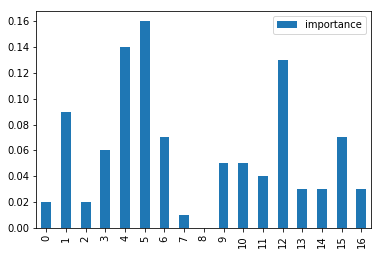

In [72]:
importances.plot.bar()

In [73]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
thresholds = sort(model_rf.feature_importances_)
thresholds

In [86]:
for thresh in thresholds:
    # select features using threshold
    sfm = SelectFromModel(model_rf, threshold=thresh, prefit=True)
    select_X_train = sfm.transform(X_train)

     # train model
    model_rf_new = RandomForestClassifier()
    model_rf_new.fit(select_X_train, y_train)

    # eval model
    select_X_test = sfm.transform(X_test)
    predictions = model_rf_new.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f" % (thresh, select_X_train.shape[1], accuracy)) 

Thresh=0.004, n=17, Accuracy: 0.85
Thresh=0.008, n=16, Accuracy: 0.84
Thresh=0.020, n=15, Accuracy: 0.84
Thresh=0.024, n=14, Accuracy: 0.84
Thresh=0.027, n=13, Accuracy: 0.83
Thresh=0.028, n=12, Accuracy: 0.84
Thresh=0.030, n=11, Accuracy: 0.84
Thresh=0.038, n=10, Accuracy: 0.85
Thresh=0.045, n=9, Accuracy: 0.83
Thresh=0.050, n=8, Accuracy: 0.84
Thresh=0.062, n=7, Accuracy: 0.82
Thresh=0.068, n=6, Accuracy: 0.82
Thresh=0.074, n=5, Accuracy: 0.80
Thresh=0.091, n=4, Accuracy: 0.78
Thresh=0.125, n=3, Accuracy: 0.78
Thresh=0.143, n=2, Accuracy: 0.69
Thresh=0.162, n=1, Accuracy: 0.61


In [109]:
model_rf_best =  SelectFromModel (model_rf_best, threshold=0.038)
model_rf_best.fit(X_train, y_train)

SelectFromModel(estimator=SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
 ...None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.038),
        norm_order=1, prefit=False, threshold=0.038)

In [110]:
predict = model_rf.predict(X_test)
classifi_report = classification_report(y_test, predict)
print(classifi_report)
confus_mat = ConfusionMatrix(list(y_test), list(predict))

             precision    recall  f1-score   support

      dance       0.77      0.83      0.80       455
       jazz       0.83      0.90      0.86       437
        rap       0.86      0.85      0.85       455
       rock       0.78      0.66      0.71       453

avg / total       0.81      0.81      0.81      1800



In [111]:
rfe_model= RFE(model_rf_best, n_features_to_select=10)
print(rfe_model)

RFE(estimator=SelectFromModel(estimator=SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
 ...None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.038),
        norm_order=1, prefit=False, threshold=0.038),
  n_features_to_select=10, step=1, verbose=0)


In [112]:
rfe_model = model_rf.fit(X_train, y_train)

In [113]:
predictions = rfe_model.predict(X_test)

In [114]:
print(accuracy_score(y_test, predictions))

0.8038888888888889
